In [3]:
import pandas as pd
import numpy as np

features = pd.read_csv("wet.csv")
features = pd.get_dummies(features)

labels = np.array(features["actual"])
labels.shape

(348,)

In [4]:

features = features.drop("actual", axis=1)
feature_list = list(features.columns)
features.head()


,year,month,day,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,46,46,46,41,0,0,0,0,0,1,0


In [6]:

features = np.array(features)

In [7]:

from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)

print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


In [8]:
# Vypocet odchylky aktulani teploty od prumeru
baseline_preds = test_features[:, feature_list.index('average')]
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.06


In [9]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(train_features, train_labels);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
# Vypocet odchylky aktualni teploty od predikovanych hodnot (Farenheit)
predictions = rf.predict(test_features)

errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.87 degrees.


In [11]:
# Presnost predikovanych dat v porovnani se skutecne namerenymi daty
mapeav = 100 * (baseline_errors / test_labels)
accuracyav = 100 - np.mean(mapeav)

mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)

print('Presnost bez predikce:', round(accuracyav, 2), '%.')
print('Presnost predikce:', round(accuracy, 2), '%.')

Presnost bez predikce: 92.3 %.
Presnost predikce: 93.94 %.


Variable: temp_1               Importance: 0.66
Variable: average              Importance: 0.15
Variable: forecast_noaa        Importance: 0.05
Variable: forecast_acc         Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


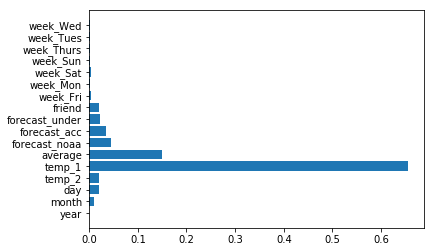

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# Vypocet vahy promenych pri predikci ( max. 1)
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

feature_list_tup = tuple(feature_list)

y_values = np.arange(len(feature_list_tup))
plt.barh(y_values, importances)
plt.yticks(y_values, feature_list_tup)
plt.show()


In [12]:
import datetime

# Srovnani skutecne namerenych teplot a hodnot vyslich z  predikovaciho algoritmu 
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
real_values = (test_labels[:] - 32) * 0.5556


test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

prediction_celsius = (predictions - 32) *0.556

predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': prediction_celsius, "real_values": real_values})
predictions_data = predictions_data.sort_values(by="date")
predictions_data.head(30)

,date,prediction,real_values
51,2016-01-04,5.618936,4.4448
43,2016-01-06,5.780176,10.5564
76,2016-01-08,6.511316,8.8896
27,2016-01-10,8.033088,11.1120
73,2016-01-17,10.268208,10.0008
32,2016-01-23,12.892528,8.8896
25,2016-01-26,11.693792,13.3344
37,2016-01-31,10.799744,8.3340
61,2016-02-03,10.041916,9.4452
15,2016-02-09,13.351228,16.6680


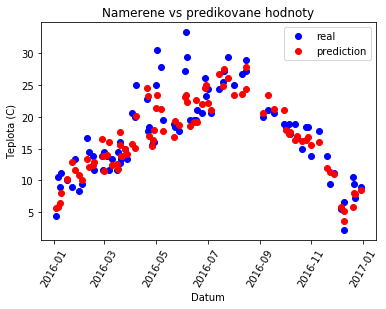

In [17]:
import datetime
# Srovnani skutecne namerenych teplot a hodnot vyslich z  predikovaciho algoritmu a jejich vyplotovani do grafu
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

plt.plot(predictions_data['date'], predictions_data['real_values'], 'bo', label = 'real')

plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

plt.xlabel('Datum'); plt.ylabel('Teplota (C)'); plt.title('Namerene vs predikovane hodnoty');
